In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
lc_df = pd.read_csv('../data/lc_cleaned.csv')

In [3]:
lc_df.sample(5)

,amount,title,risk_score,debt_to_income_ratio,state,length_of_emp,policy_code,year,status,region,division
1980719,10000.0,debt consolidation,529.0,0.0911,NY,10+ years,1.0,2016,1,Northeast,Middle Atlantic
1980034,8000.0,other,694.0,0.2465,MS,3 years,1.0,2016,1,South,East South Central
2832380,10000.0,debt consolidation,659.0,0.2783,CA,< 1 year,0.0,2012,0,West,Pacific
1043642,3000.0,other,699.0,0.1276,VA,NaN,1.0,2016,1,South,South Atlantic
3257523,10000.0,debt consolidation,NaN,-0.0100,OH,5 years,0.0,2016,0,Midwest,East North Central


In [4]:
lc_df.status.value_counts()

1    2260668
0    1048554
Name: status, dtype: int64

In [5]:
lc_df.describe()

,amount,risk_score,debt_to_income_ratio,policy_code,year,status
count,3.309222e+06,3.042280e+06,3.307511e+06,3.309222e+06,3.309222e+06,3.309222e+06
mean,1.447392e+04,6.636889e+02,2.652142e+00,6.837843e-01,2.014765e+03,6.831418e-01
std,1.060232e+04,1.159391e+02,2.873955e+02,4.656886e-01,2.579288e+00,4.652517e-01
min,0.000000e+00,0.000000e+00,-1.000000e-02,0.000000e+00,2.007000e+03,0.000000e+00
25%,6.500000e+03,6.300000e+02,1.059000e-01,0.000000e+00,2.012000e+03,0.000000e+00
50%,1.200000e+04,6.840000e+02,1.770000e-01,1.000000e+00,2.016000e+03,1.000000e+00
75%,2.000000e+04,7.240000e+02,2.586000e-01,1.000000e+00,2.017000e+03,1.000000e+00
max,1.400000e+06,9.750000e+02,5.000003e+05,2.000000e+00,2.018000e+03,1.000000e+00


approval by year

In [6]:
sns.set(rc={'figure.figsize':(12, 5)})

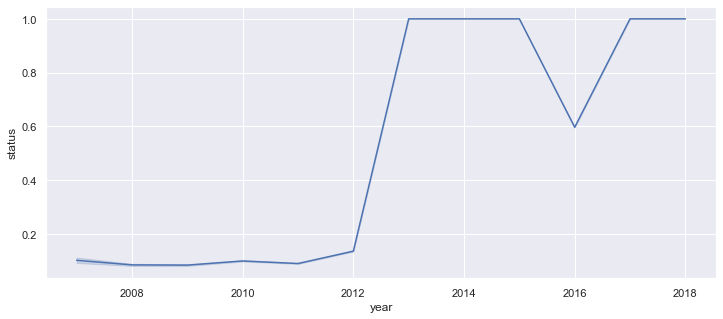

In [7]:
sns.lineplot(data = lc_df, x = 'year', y = 'status', estimator = 'mean', ci = 99)

use data from 2007 to 2012

In [8]:
lc_eo2012 = lc_df[lc_df['year']<=2012]

In [9]:
print(lc_eo2012.shape)
print('--'*30)
print(lc_eo2012.status.value_counts())

(851372, 11)
------------------------------------------------------------
0    755470
1     95902
Name: status, dtype: int64


In [10]:
lc_eo2012 = lc_eo2012.sort_values(['year','state','length_of_emp'], ascending = [True, True, False]).\
            reset_index().drop(['index'], axis = 1)

In [11]:
lc_eo2012.head(10)

,amount,title,risk_score,debt_to_income_ratio,state,length_of_emp,policy_code,year,status,region,division
0,5000.0,kcgyrl79,539.0,0.0000,AK,< 1 year,0.0,2007,0,West,Pacific
1,500.0,rbinak,526.0,0.2103,AK,< 1 year,0.0,2007,0,West,Pacific
2,25000.0,akav8r,693.0,0.4425,AK,< 1 year,0.0,2007,0,West,Pacific
3,21250.0,emorle,441.0,0.1305,AK,< 1 year,0.0,2007,0,West,Pacific
4,9000.0,yancyrandi,564.0,0.0358,AK,< 1 year,0.0,2007,0,West,Pacific
5,23000.0,tracy45,526.0,0.2385,AK,7 years,0.0,2007,0,West,Pacific
6,3500.0,debtbgone,436.0,0.4181,AK,5 years,0.0,2007,0,West,Pacific
7,3000.0,success,536.0,0.0000,AK,4 years,0.0,2007,0,West,Pacific
8,5000.0,jolfstn,547.0,0.0424,AK,4 years,0.0,2007,0,West,Pacific
9,3000.0,nordicgirl,590.0,0.1922,AK,3 years,0.0,2007,0,West,Pacific


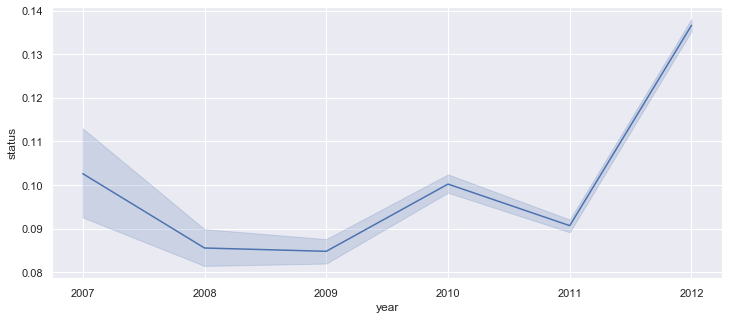

In [12]:
sns.lineplot(data = lc_eo2012, x = 'year', y = 'status', estimator = 'mean', ci = 99)

credit score vs approval

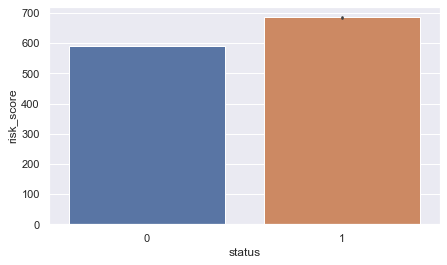

In [13]:
sns.set(rc={'figure.figsize':(7, 4)})
sns.barplot(data = lc_eo2012, x = 'status', y = 'risk_score', ci = 99)

amount vs approval

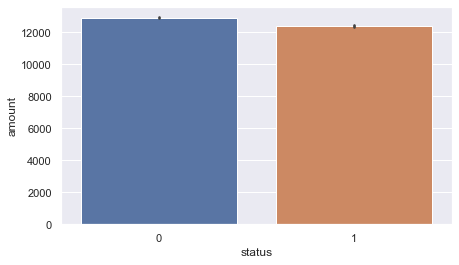

In [14]:
sns.set(rc={'figure.figsize':(7, 4)})
sns.barplot(data = lc_eo2012, x = 'status', y = 'amount', ci = 99)

num of requests by credit score by status

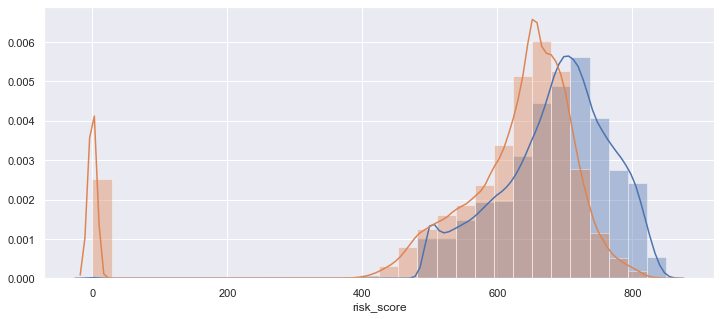

In [15]:
sns.set(rc={'figure.figsize':(12, 5)})
sns.distplot(lc_eo2012[lc_eo2012['status'] == 1].risk_score, bins = 30, hist = True, rug = False)
sns.distplot(lc_eo2012[lc_eo2012['status'] == 0].risk_score, bins = 30, hist = True, rug = False)

debt-to-inc-ratio vs approval

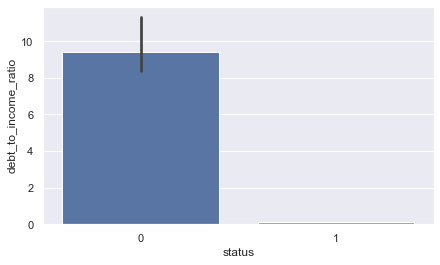

In [16]:
sns.set(rc={'figure.figsize':(7, 4)})
sns.barplot(data = lc_eo2012, x = 'status', y = 'debt_to_income_ratio', ci = 99)

debt-to-income ratio by length of emp and status

C:\Users\aznan\anaconda3\lib\site-packages\seaborn\axisgrid.py:728: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


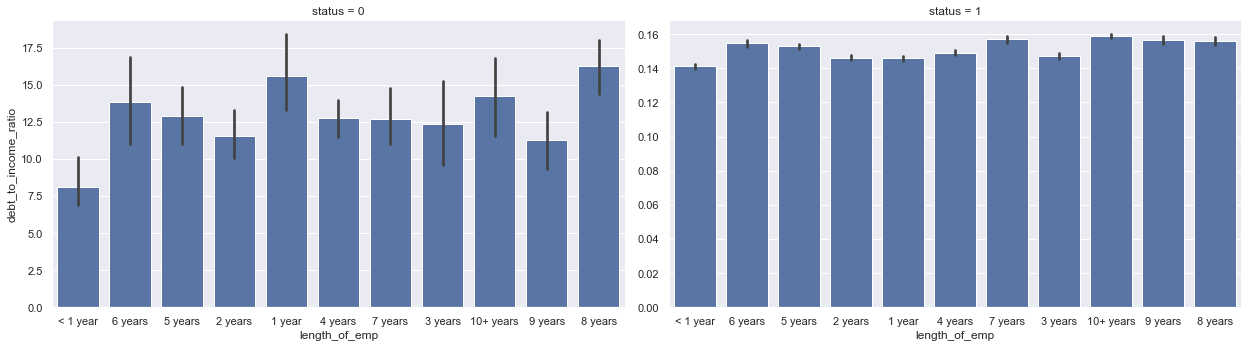

In [25]:
b = sns.FacetGrid(lc_eo2012, col = 'status', sharey = False, height = 5, aspect = 1.75)
b.map(sns.barplot, 'length_of_emp', 'debt_to_income_ratio')

length of emp vs approval

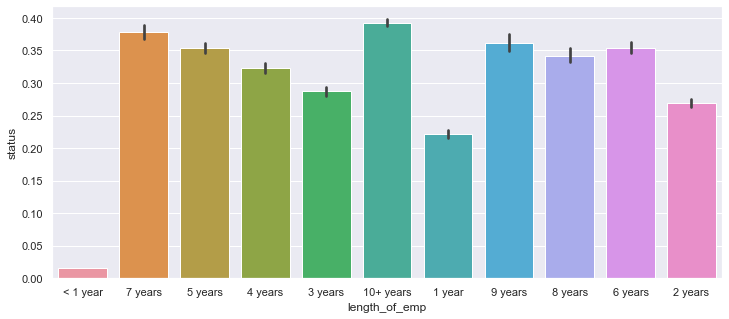

In [18]:
sns.set(rc={'figure.figsize':(12, 5)})
sns.barplot(data = lc_eo2012, x = 'length_of_emp', y = 'status', ci = 99)

geo division vs approval

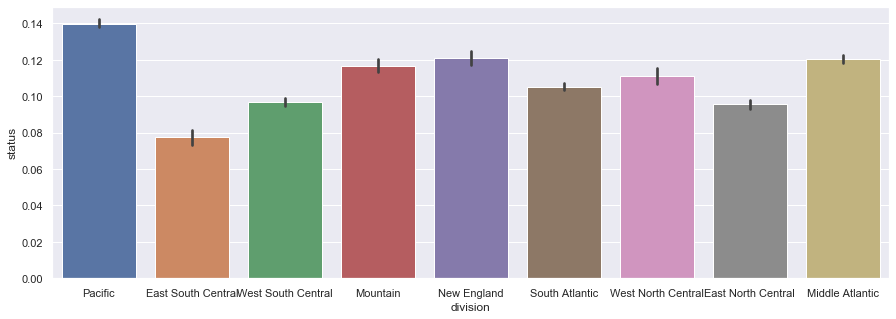

In [19]:
sns.set(rc={'figure.figsize':(15, 5)})
sns.barplot(data = lc_eo2012, x = 'division', y = 'status', ci = 99)

geo region vs approval

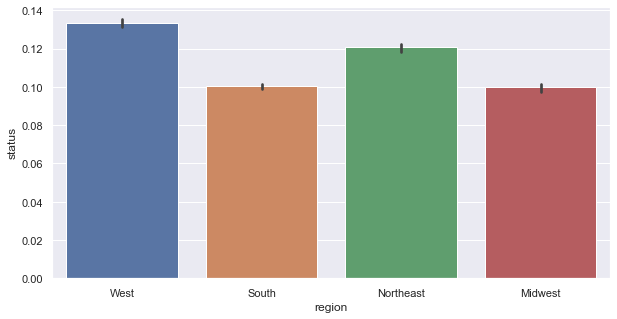

In [20]:
sns.set(rc={'figure.figsize':(10, 5)})
sns.barplot(data = lc_eo2012, x = 'region', y = 'status', ci = 99)

credit score by year

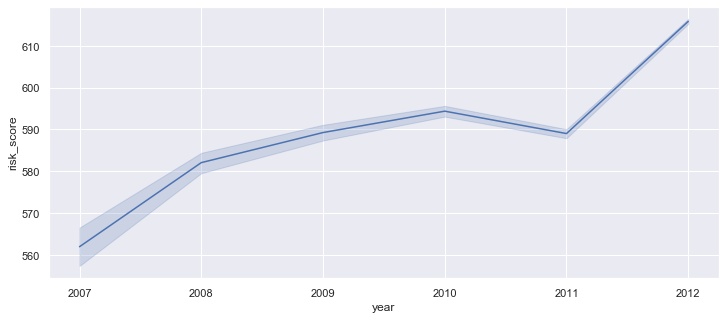

In [21]:
sns.set(rc={'figure.figsize':(12, 5)})
sns.lineplot(data = lc_eo2012, x = 'year', y = 'risk_score', estimator = 'mean', ci = 99)

credit score by length of emp

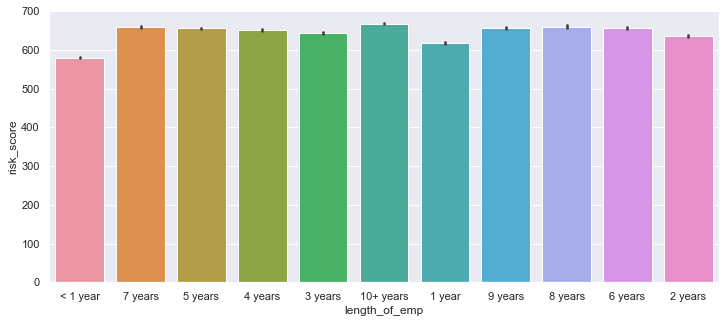

In [22]:
sns.set(rc={'figure.figsize':(12, 5)})
sns.barplot(data = lc_eo2012, x = 'length_of_emp', y = 'risk_score', ci = 99)

number of requests by length of emp

In [23]:
lc_eo2012.groupby('length_of_emp')[['title']].count().reset_index().sort_values('title', ascending = False)

,length_of_emp,title
10,< 1 year,583269
1,10+ years,63085
2,2 years,35761
0,1 year,32687
3,3 years,28652
4,4 years,23537
5,5 years,22614
6,6 years,17274
7,7 years,13001
8,8 years,11329


credit score vs amount

[(0, 100000), (300, 900)]

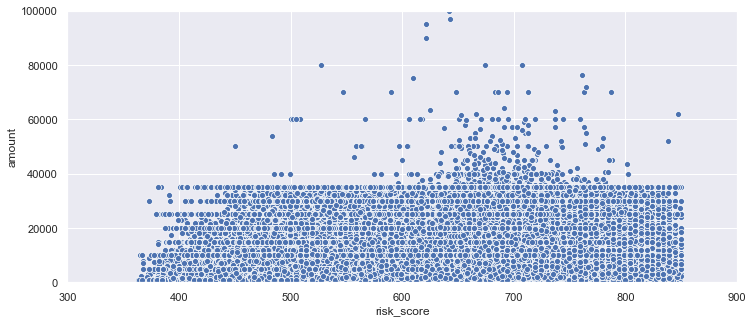

In [24]:
sns.scatterplot(data = lc_eo2012, x = 'risk_score', y = 'amount').set(xlim=(300,900), ylim=(0,100000))

title analysis

In [70]:
lc_0_title = lc_eo2012[lc_eo2012['status'] == 0].title.str.split(' ')
lc_1_title = lc_eo2012[lc_eo2012['status'] == 1].title.str.split(' ')

In [45]:
lc_0_title.index

Int64Index([     0,      1,      2,      3,      4,      5,      6,      7,
                 8,      9,
            ...
            851359, 851360, 851361, 851365, 851366, 851367, 851368, 851369,
            851370, 851371],
           dtype='int64', length=755470)

In [72]:
for r in lc_0_title.index:
    if isinstance(lc_0_title[r], list) == False:
        print(lc_0_title[r])

nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan


In [58]:
title_list_0 = []
for r in lc_0_title.index:
    title_list_0.extend(lc_0_title[r])

TypeError: 'float' object is not iterable

In [57]:
title_list_0

['kcgyrl79',
 'rbinak',
 'akav8r',
 'emorle',
 'yancyrandi',
 'tracy45',
 'debtbgone',
 'success',
 'jolfstn',
 'nordicgirl']

In [ ]:
lc_eo2012.head(5)

In [ ]:
from collections import Counter

In [ ]:
le

In [ ]:
lc_eo2012['title'].str.split(' ')

In [ ]:
Counter(lc_eo2012[:100].title)